# Moreyball - Exploring the Impact of Analytics on the NBA
**A Brief History:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;During the early 2000s, Daryl Morey, an analytical consultant with Ernst & Young, made a notable transition from the business world into professional basketball. Inspired by the success of Billy Beane’s application of analytics in baseball, Morey helped bring a data-driven mindset to the NBA during the 2003 to 2007 seasons. During this time with the Boston Celtics and Houston Rockets, Morey emphasized efficiency above all, valuing three-point shots, layups, and free throws while minimizing inefficient mid-range jumpers. His philosophy sparked both admiration and criticism, but it undeniably reshaped how teams evaluate players, build rosters, and run offenses.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since then, analytics has become a core part of nearly every NBA front office. The ripple effects are clear: leaguewide, there has been a dramatic rise in three-point attempts, pace of play, and positionless basketball. Yet for longtime fans, the shift is not always welcomed. My grandma, who has been an NBA fan for the past 40 years, now finds the modern game somewhat harder to enjoy. She often notes during games that there are "too many whistles" and that "everyone just jacks up threes." Her sentiment echoes the feelings of a broad range of fans as analytics continue to create tension between innovation and tradition, redefining how basketball is enjoyed and played.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Consequently, for my project, I plan to analyze the periods before, during, and after the 2003 to 2007 Moreyball seasons to see whether fan sentiments related to "foul-baiting", heavier three pointer reliance, and play style changes are supported by publicly available NBA statistics. By examining trends in shot selection, pace, foul rates, and efficiency, I aim to better understand how analytics have reshaped the game and whether those changes align with or diverge from the preferences of longtime fans like my grandma.<br>

**Project Overview:**<br>
However, rather than analyzing Morey's Celtics/Rockets specifically, I instead plan to investigate league-wide trends that have emerged following Morey's influence since the mid 2000's, focusing on three key areas:

1. Shot selection<br>
3. Offensive efficiency<br>
3. "Foul-baiting"<br>

**Objectives:**<br>
* Investigate how NBA strategy has shifted due to the rise of analytics
* Create data visualizations to support exploratory (descriptive) analysis
* Consider the ongoing debate around whether analytics has improved or diminished the entertainment and fundamentals of the sport

**Tools/Resources:**<br>
* Python
* Pandas
* Kaggle NBA Datasets

**DISCLAIMER:**<br>
As someone newer to coding and data analysis, this project will also serve as a learning experience. I hope to accomplish all of my goals over the coming weeks, but I may have to pivot the projects direction as I go along. Consequently, I welcome any feedback, suggestions, or resources that might help shape this project.

------------------------------------------------------------------------------------------



**Initialization:**<br>
The code below initializes the environment by importing the necessary libraries and confirming that my datasets have been loaded properly.

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

print(os.listdir('/kaggle/input/basketball'))
print(os.listdir('/kaggle/input/nba-aba-baa-stats'))

['nba.sqlite', 'csv']
['Advanced.csv', 'Player Season Info.csv', 'Player Career Info.csv', 'Player Shooting.csv', 'Opponent Stats Per Game.csv', 'Draft Pick History.csv', 'Player Totals.csv', 'Opponent Stats Per 100 Poss.csv', 'Per 100 Poss.csv', 'Team Summaries.csv', 'Player Per Game.csv', 'All-Star Selections.csv', 'End of Season Teams (Voting).csv', 'Player Play By Play.csv', 'End of Season Teams.csv', 'Team Stats Per 100 Poss.csv', 'Per 36 Minutes.csv', 'Opponent Totals.csv', 'Team Abbrev.csv', 'Player Award Shares.csv', 'Team Totals.csv', 'Team Stats Per Game.csv']


**Dataset Testing:**<br>
The next few blocks explore the "basketball" dataset to better understand its structure, utilizing the display.max function to efficiently identify its most useful columns.

In [2]:
#datset 1 function utilization
pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/input/basketball/csv/game.csv', parse_dates=['game_date'])

df.shape

(65698, 55)

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [4]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star
65697,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All Star


**1. Shot Selection Graphing:**<br>
This section visualizes how NBA shot selection has evolved by analyzing changes in the average three-point attempt rate across different eras, found in the "basketball" dataset. The 3P attempt rate represents the percentage of a team’s total shot attempts taken from beyond the three-point line. Using regular season data, the analysis compares this rate across three distinct periods: Pre-Morey, Moreyball, and Post-Moreyball. The focus is on seasons from 1996 onward, marking the start of the NBA’s detailed play-by-play tracking era, which enables more accurate and granular statistical insights.

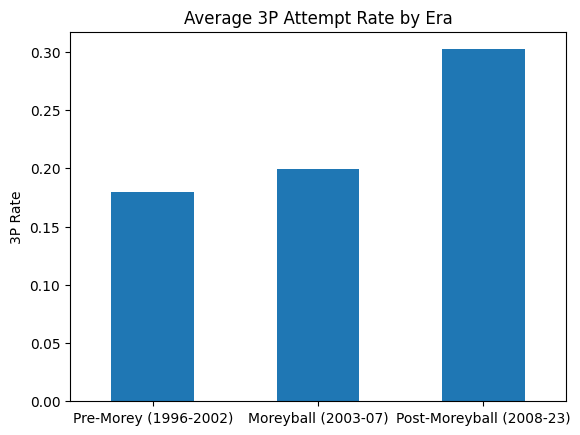

In [5]:
#filtering out all star game and playoff stats
df = df[df['season_type'] == 'Regular Season']

#seperating home and away data
home_cols = [col for col in df.columns if col.endswith('_home')]
away_cols = [col for col in df.columns if col.endswith('_away')]

home_df = df[['game_id', 'game_date'] + home_cols].copy()
home_df.columns = ['game_id', 'game_date'] + [col.replace('_home', '') for col in home_cols]
home_df['team_location'] = 'home'

away_df = df[['game_id', 'game_date'] + away_cols].copy()
away_df.columns = ['game_id', 'game_date'] + [col.replace('_away', '') for col in away_cols]
away_df['team_location'] = 'away'

#combining the two
games_df = pd.concat([home_df, away_df], ignore_index=True)

#extracting year through date time
games_df['game_date'] = pd.to_datetime(games_df['game_date'])
games_df['season'] = games_df['game_date'].dt.year

#creating 3 sepearte era's,
# Pre-Morey starts with 1996 because thats when the NBA started tracking play by play data
# Moreyball begins the years of Daryl Morey introduceing data analytics
# Post_Moreyball follows the years after his influence gained widespread traction from all teams

def assign_era(date):
    if 1996 <= date.year <= 2002:
        return 'Pre-Morey (1996-2002)'
    elif 2003 <= date.year <= 2007:
        return 'Moreyball (2003-07)'
    elif date.year >= 2008:
        return 'Post-Moreyball (2008-23)'
    else:
        return None

games_df['era'] = games_df['game_date'].apply(assign_era)

#3p_rate = the percentage of shot attempts in a game that are threes
games_df['3p_rate'] = games_df['fg3a'] / games_df['fga']

era_order = ['Pre-Morey (1996-2002)', 'Moreyball (2003-07)', 'Post-Moreyball (2008-23)']

#plotting the average 3P rate by era
games_df.groupby('era')['3p_rate'].mean().reindex(era_order).plot(
    kind='bar',
    title='Average 3P Attempt Rate by Era',
    ylabel='3P Rate',
    xlabel='',
    rot=0
);

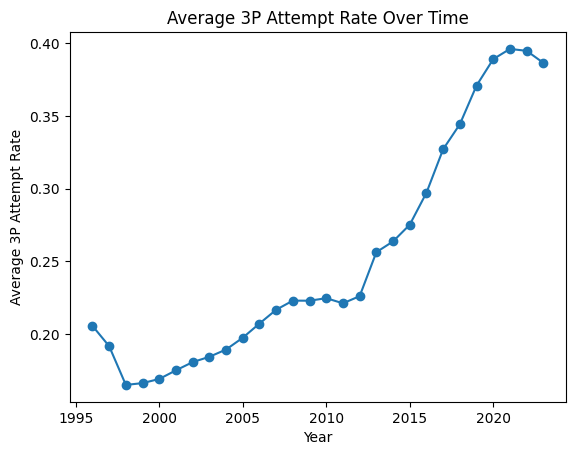

In [6]:
games_df['3p_rate'] = games_df['fg3a'] / games_df['fga']

#group seasons and computing the average 3P attempt rate
yearly_3p_rate = games_df.groupby('season')['3p_rate'].mean().sort_index()

yearly_3p_rate = yearly_3p_rate[yearly_3p_rate.index >= 1996]

#plotting a different view for better year over year growth metrics
yearly_3p_rate.plot(
    kind='line',
    title='Average 3P Attempt Rate Over Time',
    xlabel='Year',
    ylabel='Average 3P Attempt Rate',
    marker='o'
);

**2. Offensive Efficiency Graphing:**<br>
This section examines trends in some of the most prominent metrics used to measure offensive success during the NBA’s play-by-play era, found in the "basketball" dataset.

Key metrics tracked include:

1. eFG% (Effective Field Goal Percentage): Adjusts shooting percentage to account for the added value of three-pointers.
2. TS% (True Shooting Percentage): Measures overall scoring efficiency by incorporating field goals, three-pointers, and free throws.
3. PPP (Points Per Possession): Points scored per possession, reflecting offensive effectiveness.
4. Possessions: An estimate of the number of offensive possessions per game, indicating game pace.<br>

These metrics are averaged by season to highlight changes in offensive efficiency and style over time.

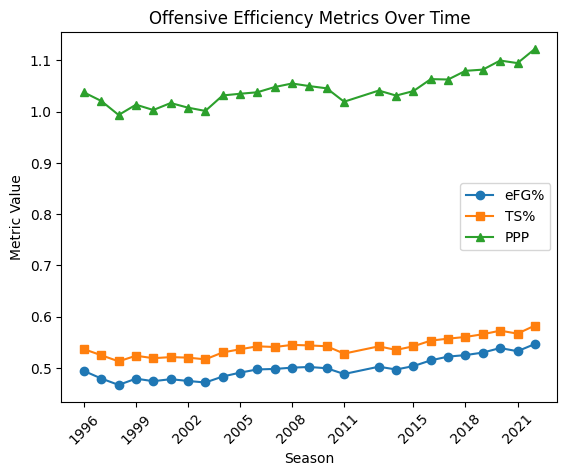

In [7]:
#defining column mapings
home_cols = {
    'game_id': 'game_id',
    'game_date': 'game_date',
    'team_id_home': 'team_id',
    'team_abbreviation_home': 'team_abbreviation',
    'team_name_home': 'team_name',
    'fgm_home': 'fgm',
    'fga_home': 'fga',
    'fg3m_home': 'fg3m',
    'fg3a_home': 'fg3a',
    'ftm_home': 'ftm',
    'fta_home': 'fta',
    'oreb_home': 'oreb',
    'dreb_home': 'dreb',
    'reb_home': 'reb',
    'ast_home': 'ast',
    'tov_home': 'tov',
    'pts_home': 'pts',
    'season_id': 'season_id',
    'season_type': 'season_type',
}

away_cols = {
    'game_id': 'game_id',
    'game_date': 'game_date',
    'team_id_away': 'team_id',
    'team_abbreviation_away': 'team_abbreviation',
    'team_name_away': 'team_name',
    'fgm_away': 'fgm',
    'fga_away': 'fga',
    'fg3m_away': 'fg3m',
    'fg3a_away': 'fg3a',
    'ftm_away': 'ftm',
    'fta_away': 'fta',
    'oreb_away': 'oreb',
    'dreb_away': 'dreb',
    'reb_away': 'reb',
    'ast_away': 'ast',
    'tov_away': 'tov',
    'pts_away': 'pts',
    'season_id': 'season_id',
    'season_type': 'season_type',
}

#applying thesen mappings to the dataframe
home_df = df[list(home_cols.keys())].rename(columns=home_cols)
home_df['location'] = 'home'

away_df = df[list(away_cols.keys())].rename(columns=away_cols)
away_df['location'] = 'away'

#forming a full dataset
team_games = pd.concat([home_df, away_df], ignore_index=True)

#extracting the season year from season_id, the last 4 digits
team_games['season_year'] = team_games['season_id'] % 10000

#calculating efficiency metrics
team_games['eFG%'] = (team_games['fgm'] + 0.5 * team_games['fg3m']) / team_games['fga']
team_games['TS%'] = team_games['pts'] / (2 * (team_games['fga'] + 0.44 * team_games['fta']))
team_games['possessions'] = team_games['fga'] + 0.44 * team_games['fta'] - team_games['oreb'] + team_games['tov']
team_games['PPP'] = team_games['pts'] / team_games['possessions']

#grouping and taking mean of each metric
season_metrics = team_games.groupby('season_year')[['eFG%', 'TS%', 'PPP']].mean().sort_index()

#filter to 1996 and later, to follow the play by play era
season_metrics_filtered = season_metrics[season_metrics.index >= 1996]

#plotting each, except possessions because it differs to much and dominates the graph
ax = season_metrics_filtered['eFG%'].plot(marker='o', label='eFG%', title='Offensive Efficiency Metrics Over Time')
season_metrics_filtered['TS%'].plot(marker='s', ax=ax, label='TS%')
season_metrics_filtered['PPP'].plot(marker='^', ax=ax, label='PPP')

#setting graph
ax.set_xlabel('Season')
ax.set_ylabel('Metric Value')
ax.set_xticks(season_metrics_filtered.index[::3])  # show every 3rd year
ax.set_xticklabels(season_metrics_filtered.index[::3].astype(int), rotation=45)
ax.legend();


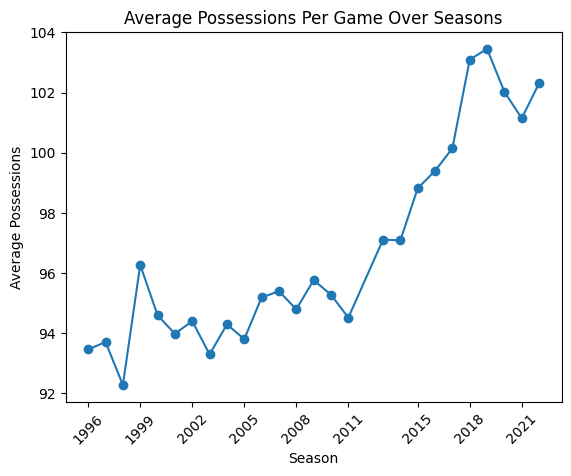

In [8]:
#extracting the season year from season_id, the last 4 digits
team_games['season_year'] = team_games['season_id'] % 10000

#grouping by season and calculating average possessions
possessions_by_season = team_games.groupby('season_year')['possessions'].mean().sort_index()

#filtering
possessions_filtered = possessions_by_season[possessions_by_season.index >= 1996]

#plotting seasons
ax = possessions_filtered.plot(marker='o', title='Average Possessions Per Game Over Seasons')
ax.set_xlabel('Season')
ax.set_ylabel('Average Possessions')

#setting x-ticks to every 3 seasons for better readability
ticks_to_show = possessions_filtered.index[::3]
ax.set_xticks(ticks_to_show)
ax.set_xticklabels(ticks_to_show.astype(int), rotation=45);

**3. Foul-Baiting Graphing:**<br>
This section explores how fouling has changed over time by inspecting the average personal fouls per team each season and total fouls per game. The visualitions for these stats aim to provide insight into how the physicality and style of play in the NBA have evolved through the years.

In [9]:
#loading the CSV from the dataset
file_path = '/kaggle/input/nba-aba-baa-stats/Team Totals.csv'
team_totals_df = pd.read_csv(file_path)

team_totals_df.head()

,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2026,NBA,Atlanta Hawks,ATL,False,6.0,1440.0,258.0,545.0,0.473,68.0,198.0,0.343,190.0,347.0,0.548,113.0,148.0,0.764,65.0,190.0,255.0,171.0,52.0,30.0,73.0,134.0,697.0
1,2026,NBA,Boston Celtics,BOS,False,6.0,1440.0,248.0,558.0,0.444,94.0,287.0,0.328,154.0,271.0,0.568,90.0,116.0,0.776,80.0,189.0,269.0,132.0,52.0,36.0,71.0,146.0,680.0
2,2026,NBA,Brooklyn Nets,BRK,False,5.0,1200.0,203.0,445.0,0.456,75.0,212.0,0.354,128.0,233.0,0.549,88.0,110.0,0.800,63.0,131.0,194.0,122.0,33.0,7.0,79.0,127.0,569.0
3,2026,NBA,Chicago Bulls,CHI,False,5.0,1200.0,220.0,437.0,0.503,68.0,169.0,0.402,152.0,268.0,0.567,106.0,135.0,0.785,51.0,183.0,234.0,153.0,38.0,22.0,81.0,111.0,614.0
4,2026,NBA,Charlotte Hornets,CHO,False,5.0,1200.0,220.0,444.0,0.495,77.0,191.0,0.403,143.0,253.0,0.565,103.0,135.0,0.763,59.0,170.0,229.0,143.0,37.0,21.0,85.0,107.0,620.0


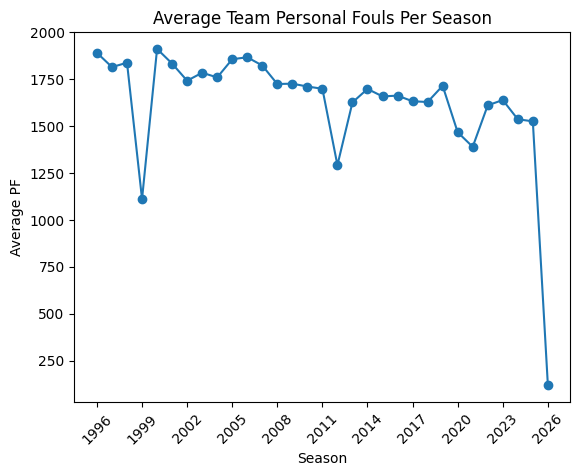

In [10]:
#filtering for concistency
team_totals_df.columns = team_totals_df.columns.str.lower()

#grouping by season to calculate average personal fouls per team
avg_fouls_by_season = team_totals_df.groupby('season')['pf'].mean().sort_index()

#filter to start from 1996
avg_fouls_by_season = avg_fouls_by_season[avg_fouls_by_season.index >= 1996]

#plotting
ax = avg_fouls_by_season.plot(
    kind='line',
    title='Average Team Personal Fouls Per Season',
    xlabel='Season',
    ylabel='Average PF',
    marker='o'
)

#setting x-ticks to every 3 seasons for better readability
ax.set_xticks(avg_fouls_by_season.index[::3])
ax.set_xticklabels(avg_fouls_by_season.index[::3].astype(int), rotation=45);

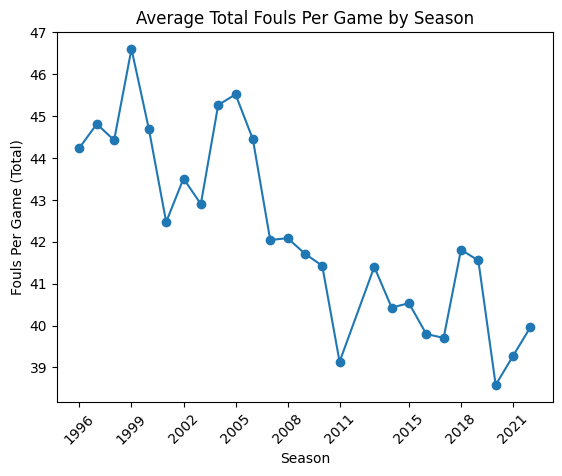

In [11]:
df['season_year'] = df['season_id'] % 10000

#combining
df['total_fouls'] = df['pf_home'] + df['pf_away']

#grouping by season and calculating average per game
avg_fouls_per_game = df.groupby('season_year')['total_fouls'].mean()

#filtering
avg_fouls_per_game = avg_fouls_per_game[avg_fouls_per_game.index >= 1996]

#plotting
ax = avg_fouls_per_game.plot(
    kind='line',
    title='Average Total Fouls Per Game by Season',
    xlabel='Season',
    ylabel='Fouls Per Game (Total)',
    marker='o'
)

ax.set_xticks(avg_fouls_per_game.index[::3])
ax.set_xticklabels(avg_fouls_per_game.index[::3].astype(int), rotation=45);

**Exploratory Analysis:**<br>
Looking at the data, it’s clear the NBA has changed a lot since the early 2000s, especially after Daryl Morey started pushing analytics during the "Moreyball" era (2003-2007). 

1. Namely, 3P shooting has definitely taken off, as teams are launching more threes than ever before, which matches what Morey believed about focusing on efficient shots. So when my grandma says, “everyone just jacks up threes,” she’s not wrong. The numbers back that up.

2. Moreover, offensive efficiency has steadily improved over time, with teams getting more out of each possession by prioritizing smarter and more purposeful shot selection. The pace of the game has also accelerated, leading to more possessions and greater scoring opportunities. In other words, the shift in play style is not arbitrary. It reflects a strategic effort to maximize efficiency. So, even if my grandma misses the days of post-ups and mid-range artistry, the data makes a strong case that today’s 3P-heavy offenses are, in many ways, simply more effective.

   *That said, efficiency hasn’t skyrocketed in the same way that three-point attempts have. The rise in offensive output is real, but it’s growing at a much slower pace compared to the explosion in 3P shooting. So while teams are scoring better, the surge in threes seems to be outpacing the gains in efficiency, which suggests that the league might still be figuring out the true sweet spot between volume and value.

3. Lastly, fouling rates have actually remained fairly steady over time, and in some seasons have even declined slightly compared to the 1990s. That might come as a surprise to many NBA fans who often describe today’s game as “softer” and feel like there are too many whistles slowing things down. While that perception isn’t strongly supported by the raw foul numbers, what has changed is how fouls are drawn. Modern players have become incredibly skilled at manipulating defenders into fouling, using slick footwork, abrupt stops, and sometimes a bit of acting to get to the free-throw line. This kind of foul-baiting has become part of the strategy, and while it’s effective, it can also make the game feel more fragmented and less physical than it once was. So even if the numbers don’t show a rise in fouling, the way fouls are used and perceived has evolved, and that is likely what fans are really reacting to.

In the end, the data tells a story of a league transformed by analytics. Its faster, more efficient, and more focused on three-point shooting. Some longtime fans might struggle with these changes, but others might appreciate how the game has evolved to be more strategic and high-scoring. My grandma’s feelings capture that tension perfectly, as she’s right about the shift in style and shot selection but maybe a little off on her critique of fouling. It’s a reminder that data and experience can sometimes tell different parts of the story.

Overall, working on this project was not only a great learning experience but also a lot of fun. Diving into the numbers helped me better understand how basketball has evolved and gave me a chance to explore the real impact of analytics on the game I love.